# Project: Investigate a Dataset - [The Movie Database (TMDb)]

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

### Dataset Description 

> This data set contains information about 10,000 movies and 12 columns (Feature) collected from The Movie Database (TMDb), including user ratings and revenue.

### Question(s) for Analysis

> 1. Movies with the largest and lowest budgets 
> 2. Movies with most and least earned revenue. 
> 3. Movies with most and least Net Profit.
> 4. The Net Profit for all movies per year.
> 5. Best Genres for all movies
> 6. Best Genres with highest profit per year **(From The Example Quation "Which genres are most popular from year to year? but with respect to the Profit")**

In [4]:
# Use this cell to set up import statements for all of the packages that you
#   plan to use.

# Remember to include a 'magic word' so that your visualizations are plotted
#   inline with the notebook. See this page for more:
#   http://ipython.readthedocs.io/en/stable/interactive/magics.html
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
%matplotlib inline


In [5]:
# Upgrade pandas to use dataframe.explode() function. 
# !pip install --upgrade pandas==0.25.0

<a id='wrangling'></a>
## Data Wrangling

> After looking on the data that we have and its features, we can now make some of process on it before going through the EDA, We need first to determine which feature we will use and which not. and then clean the features we will use.

> We will drop the features ('id', 'imdb_id', 'popularity', 'budget_adj', 'revenue_adj', 'homepage', 'keywords', 'overview', 'production_companies', 'vote_count', 'release_year')

In [6]:
# Load your data and print out a few lines. Perform operations to inspect data
#   types and look for instances of missing or possibly errant data.
df = pd.read_csv('tmdb-movies.csv')
df.head(3)

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08


In [7]:
df.drop(columns=['id', 'imdb_id', 'popularity', 'budget_adj', 'revenue_adj', 'homepage', 'keywords', 'overview', 'production_companies', 'vote_count', 'release_date', 'cast'], inplace=True)


### Data Cleaning
> After Remove unused data.
> 1. Removing Duplicates Rows
> 2. Change the lost data (its value zero) to NAN in the Columns budget, revenue and runtime

In [8]:
# After discussing the structure of the data and any problems that need to be
#   cleaned, perform those cleaning steps in the second part of this section.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   budget          10866 non-null  int64  
 1   revenue         10866 non-null  int64  
 2   original_title  10866 non-null  object 
 3   director        10822 non-null  object 
 4   tagline         8042 non-null   object 
 5   runtime         10866 non-null  int64  
 6   genres          10843 non-null  object 
 7   vote_average    10866 non-null  float64
 8   release_year    10866 non-null  int64  
dtypes: float64(1), int64(4), object(4)
memory usage: 764.1+ KB


In [9]:
df.head()

,budget,revenue,original_title,director,tagline,runtime,genres,vote_average,release_year
0,150000000,1513528810,Jurassic World,Colin Trevorrow,The park is open.,124,Action|Adventure|Science Fiction|Thriller,6.5,2015
1,150000000,378436354,Mad Max: Fury Road,George Miller,What a Lovely Day.,120,Action|Adventure|Science Fiction|Thriller,7.1,2015
2,110000000,295238201,Insurgent,Robert Schwentke,One Choice Can Destroy You,119,Adventure|Science Fiction|Thriller,6.3,2015
3,200000000,2068178225,Star Wars: The Force Awakens,J.J. Abrams,Every generation has a story.,136,Action|Adventure|Science Fiction|Fantasy,7.5,2015
4,190000000,1506249360,Furious 7,James Wan,Vengeance Hits Home,137,Action|Crime|Thriller,7.3,2015


> **Removing the Duplicated Data if any**

In [10]:
# Show the details of the Duplicated row

print('the number of duplicated rows = ', df.duplicated().sum())
df[df.duplicated()]

the number of duplicated rows =  1


,budget,revenue,original_title,director,tagline,runtime,genres,vote_average,release_year
2090,30000000,967000,TEKKEN,Dwight H. Little,Survival is no game,92,Crime|Drama|Action|Thriller|Science Fiction,5.0,2010


In [11]:
# Remove the duplicated rows and chech that.
df.drop_duplicates(inplace = True)
print('the number of duplicated rows = ', df.duplicated().sum())

the number of duplicated rows =  0


> **Change the lost data (its value zero) to NAN in the Columns budget, revenue and runtime**

> We can see in the next cell that we have about **5696 lost data (its value zero)** from budget or revenue or runtime. 
**so, let's replace this values to NAN**

In [12]:
# We will take a look on the data that have a zero Value.
df.query('budget == 0' or 'revenue == 0' or 'runtime == 0' ).info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5696 entries, 30 to 10864
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   budget          5696 non-null   int64  
 1   revenue         5696 non-null   int64  
 2   original_title  5696 non-null   object 
 3   director        5656 non-null   object 
 4   tagline         3488 non-null   object 
 5   runtime         5696 non-null   int64  
 6   genres          5674 non-null   object 
 7   vote_average    5696 non-null   float64
 8   release_year    5696 non-null   int64  
dtypes: float64(1), int64(4), object(4)
memory usage: 445.0+ KB


In [13]:
# replace the 0's to NAN and Check it again

df[['budget', 'revenue', 'runtime']] = df[['budget', 'revenue', 'runtime']].replace(0, np.NAN)
df.query('budget == 0' or 'revenue == 0' or 'runtime == 0' ).info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 0 entries
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   budget          0 non-null      float64
 1   revenue         0 non-null      float64
 2   original_title  0 non-null      object 
 3   director        0 non-null      object 
 4   tagline         0 non-null      object 
 5   runtime         0 non-null      float64
 6   genres          0 non-null      object 
 7   vote_average    0 non-null      float64
 8   release_year    0 non-null      int64  
dtypes: float64(4), int64(1), object(4)
memory usage: 0.0+ bytes


<a id='eda'></a>
## Exploratory Data Analysis
### Question(s) for Analysis

> 1. Movies with the largest and lowest budgets 
> 2. Movies with most and least earned revenue. 
> 3. Movies with most and least Net Profit.


In [14]:
### This Function takes the column name which you want to find the max and min value in it and show the all info about it.

def cal(colum_name):
    dt = df.query('{} == {}.max()'.format(colum_name, colum_name))
    dt = dt.append(df.query('{} == {}.min()'.format(colum_name, colum_name)).iloc[0])
    dt.insert(0, 'Size', ['MAX', 'MIN'])
    return dt.set_index('Size')

### Research Question 1 (Movies with the largest and lowest budgets)

> **We are going to show the max and min budgets in all Movies in the dataset**

In [15]:
cal('budget')

,budget,revenue,original_title,director,tagline,runtime,genres,vote_average,release_year
Size,,,,,,,,,
MAX,425000000.0,11087569.0,The Warrior's Way,Sngmoo Lee,Assassin. Hero. Legend.,100.0,Adventure|Fantasy|Action|Western|Thriller,6.4,2010
MIN,1.0,NaN,Fear Clinic,Robert Hall,NaN,95.0,Horror,4.1,2014


### Research Question 2  (Movies with most and least earned revenue)
> **We are going to show the max and min revenue in all Movies in the dataset**

In [16]:
cal('revenue')

,budget,revenue,original_title,director,tagline,runtime,genres,vote_average,release_year
Size,,,,,,,,,
MAX,237000000.0,2.781506e+09,Avatar,James Cameron,Enter the World of Pandora.,162.0,Action|Adventure|Fantasy|Science Fiction,7.1,2009
MIN,6000000.0,2.000000e+00,Shattered Glass,Billy Ray,NaN,94.0,Drama|History,6.4,2003


### Research Question 3  (Movies with most and least Net Profit)
> **We are going to show the max and min Net Profit in all Movies in the dataset**
> 1. we need here to calculate the Net Profit first and insert it in our dataframe, then pass it to Cal Function to find the MAX and MIN

In [17]:
# insert the Net Profit Coulmn which equal to the subtract to the money which get from the movie and which spend on it. 
df.insert(2,'net_profit',df['revenue']-df['budget'])
df.head(3)

,budget,revenue,net_profit,original_title,director,tagline,runtime,genres,vote_average,release_year
0,150000000.0,1.513529e+09,1.363529e+09,Jurassic World,Colin Trevorrow,The park is open.,124.0,Action|Adventure|Science Fiction|Thriller,6.5,2015
1,150000000.0,3.784364e+08,2.284364e+08,Mad Max: Fury Road,George Miller,What a Lovely Day.,120.0,Action|Adventure|Science Fiction|Thriller,7.1,2015
2,110000000.0,2.952382e+08,1.852382e+08,Insurgent,Robert Schwentke,One Choice Can Destroy You,119.0,Adventure|Science Fiction|Thriller,6.3,2015


In [18]:
# then pass it to the cal function to find MAX and MIN
cal('net_profit')

,budget,revenue,net_profit,original_title,director,tagline,runtime,genres,vote_average,release_year
Size,,,,,,,,,,
MAX,237000000.0,2.781506e+09,2.544506e+09,Avatar,James Cameron,Enter the World of Pandora.,162.0,Action|Adventure|Fantasy|Science Fiction,7.1,2009
MIN,425000000.0,1.108757e+07,-4.139124e+08,The Warrior's Way,Sngmoo Lee,Assassin. Hero. Legend.,100.0,Adventure|Fantasy|Action|Western|Thriller,6.4,2010


> **Note here:that the high Profit is 2.544506e+09 but the Low is a negative value Which means that the film failed producer lost money equivalent to 4.139124e+08**

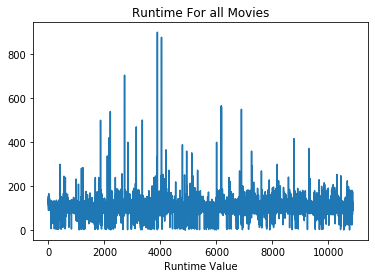

In [19]:
plt.plot(df.runtime)
plt.title('Runtime For all Movies')
plt.xlabel('Runtime Value')
plt.show()

> **Let's make some realtions with the Features**

## Research 4 (The Net Profit for all movies per year)

> We can Calculate the Net Profit For the each Year for the all Movies  in it, that gives me a conclusions about the years which have more earning  

In [20]:

# First we need to group the all movies by release year and then sum the profits in it.
profits_year = df.groupby('release_year')['net_profit'].sum()
profits_year.head(10)

release_year
1960    108198052.0
1961    299083188.0
1962    166879846.0
1963    115411882.0
1964    294678387.0
1965    399281854.0
1966     52468689.0
1967    636334637.0
1968    168271762.0
1969    206862989.0
Name: net_profit, dtype: float64

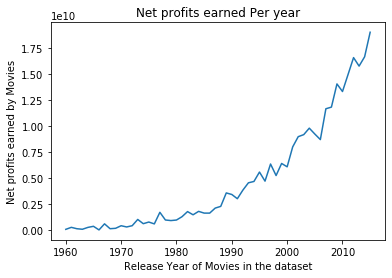

In [21]:
plt.xlabel('Release Year of Movies in the dataset', fontsize = 10)
plt.ylabel('Net profits earned by Movies', fontsize = 10)
plt.title('Net profits earned Per year')
plt.plot(profits_year)

plt.show()

## Note:

>  **We can note that the Net Profits Increase by time and the Trade in film production increase too, but to We have to take into account inflation in the currency and other economic factors**

## Research 5 (Best Genres for all movies)

> 1. **Let' s take a look on the Genrse of the Movies**
> 2. **We will seperate the genres first and then split it by "|" and count the values on it** 

In [22]:
data = pd.Series((df['genres'].str.cat(sep = '|')).split('|')).value_counts(ascending = False)
data

Drama              4760
Comedy             3793
Thriller           2907
Action             2384
Romance            1712
Horror             1637
Adventure          1471
Crime              1354
Family             1231
Science Fiction    1229
Fantasy             916
Mystery             810
Animation           699
Documentary         520
Music               408
History             334
War                 270
Foreign             188
TV Movie            167
Western             165
dtype: int64

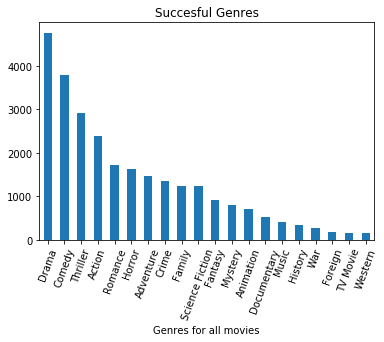

In [23]:
data.plot(kind = 'bar', title = 'Succesful Genres')
plt.xlabel('Genres for all movies')
plt.xticks(rotation=70)
plt.show()

### We can note that the drama and comedy is the most popular genres and the western is the least popular

## Research 6 (Best Genres With highest profit per year)

> 1. We need first to filter the data and take the highest Movies profits by the median.
> 2. And Then take these values and visuals them.

In [24]:
# Calculate the median and filter the data by it.

high_profit = df[df['net_profit'] > df['net_profit'].median()][['genres', 'release_year']]

high_profit ####> We can Find that we have about 1927 row from all the Movies dataset (about 20%).

,genres,release_year
0,Action|Adventure|Science Fiction|Thriller,2015
1,Action|Adventure|Science Fiction|Thriller,2015
2,Adventure|Science Fiction|Thriller,2015
3,Action|Adventure|Science Fiction|Fantasy,2015
4,Action|Crime|Thriller,2015
...,...,...
10762,Drama|War,1978
10770,Drama|Crime,1978
10771,Drama|Animation|Adventure,1978
10780,Horror|Thriller|Science Fiction|Mystery,1978


> **Now, We have a DataFrame with two columns Genres and Release year for all movies which net profits is higher the median**

### but We need to do some process first

> 1. Group all the Genres for each spacific year.
> 2. Extract these Genres and Count it and Calculate the Percentage For the Popular Genre.
> 3. Finally, add them to our DataFrame.

In [25]:
high_profit = df[df['net_profit'] > df['net_profit'].median()][['genres', 'release_year']]

# Group the data by the release year 
high_profit['genres'] = high_profit['genres'] + '|'
high_profit = high_profit.groupby('release_year').sum()


# Loop for all the Collected Genres per year and split it in Series and then find the Percentage of the Most Popular Gentre.
perc = []
id_max = []
for i in high_profit['genres']:
    x = pd.Series(i.split('|')).value_counts()
    perc.append( (x.max()/x.sum())*100 )
    id_max.append(x.idxmax())

 # Add our New Series to the DataFrame 
high_profit['percentage'] = perc
high_profit['genres'] = id_max

 # Convert the release from Index to Column and Combine it with the Genres in one Column
high_profit.reset_index(inplace = True)
high_profit['release_year'] = high_profit['release_year'].astype(str)


In [26]:
high_profit['genres_year'] = high_profit['release_year'] + " " + high_profit['genres']
high_profit.head()

,release_year,genres,percentage,genres_year
0,1960,Drama,30.000000,1960 Drama
1,1961,Adventure,16.666667,1961 Adventure
2,1962,Adventure,25.000000,1962 Adventure
3,1963,History,14.285714,1963 History
4,1964,Family,16.666667,1964 Family


> **We can see that the percentage For the most popular movie does not change significantly over the years except for the year 1966**

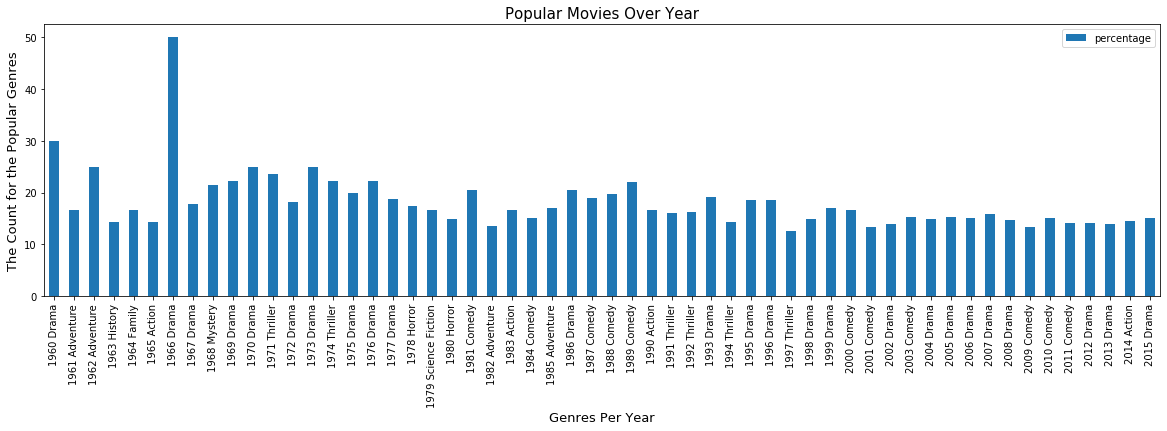

In [27]:
high_profit[['percentage', 'genres_year']].set_index('genres_year').plot(kind = 'bar', figsize= (20, 5))
plt.xlabel('Genres Per Year', fontsize = 13)
plt.ylabel('The Count for the Popular Genres', fontsize = 13)
plt.title('Popular Movies Over Year', fontsize = 15)
plt.show()

## Research 7 Which Genre is Popular among all years from the most popular Genre in each year?

> We can See from the next cell that the Drama is the Most.

In [28]:
high_profit['genres'].value_counts()

Drama              25
Comedy             11
Thriller            6
Adventure           4
Action              4
Horror              2
History             1
Science Fiction     1
Family              1
Mystery             1
Name: genres, dtype: int64

## Research 8 :(Relation among the Budget, Revenue, and Net Profit)

> **We can see in the next cell that the relationship between the three features is ALMOST proportional.**

> 1. the Relation between the budget and the revenue is proportional And therefore the Net profit

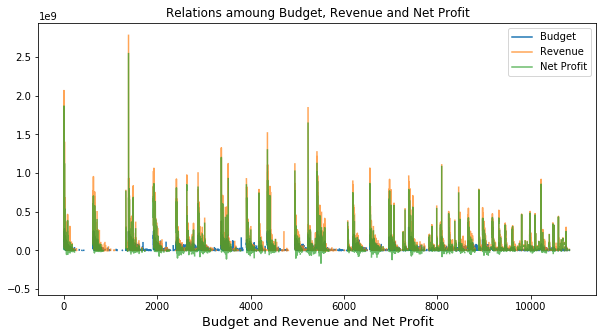

In [29]:
plt.figure(figsize= (10, 5))
df['budget'].plot()
df['revenue'].plot(alpha = 0.7)
df['net_profit'].plot(alpha = 0.7)

plt.xlabel('Budget and Revenue and Net Profit', fontsize = 13)
plt.legend(['Budget', 'Revenue', 'Net Profit'])
plt.title('Relations amoung Budget, Revenue and Net Profit')

plt.show()

<a id='conclusions'></a>

## Conclusions

> **I Have write the notes along the notebook but I will write some of them here.**
> 1. We can note that the Net Profits Increase by time and the Trade in film production increase too, but to We have to take into account inflation in the currency and other economic factors
> 2. We can note that the drama and comedy is the most popular genres and the western is the least popular
> 3. that the high Profit is 2.544506e+09 but the Low is a negative value Which means that the film failed producer lost money equivalent to 4.139124e+08